In [1]:
!pip install mercury
!pip install oracledb
!pip install matplotlib
!pip install ipywidgets matplotlib
!pip install ipympl


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: devscripts 2.22.1ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of devscripts or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pdfminer-six -VERSION- has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pdfminer-six or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: devscripts 2.22.1ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement i

In [1]:
#%matplotlib notebook 
%matplotlib widget
#make the plots interactive

In [2]:
import mercury as mr # for widgets
import oracledb
import random # for random data generation
from matplotlib import pyplot as plt # for chart
import time
import numpy as np
from ipywidgets import interactive

In [3]:
from pythonSqlQuery import *
from plotData import *

In [4]:
data =execute_sql_script("../sqlScripts/selectAccidentData.sql")
labels=["Severity", "Distance (mi)"]


Successfully executed script: ../sqlScripts/selectAccidentData.sql


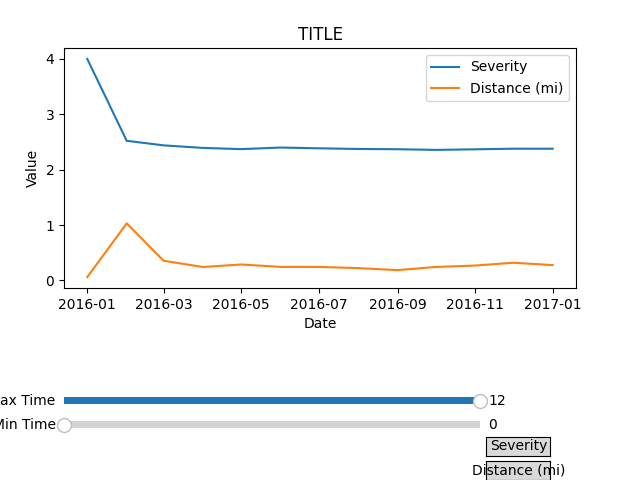

In [7]:
plot(data,labels,"TITLE")